# Rede neural convolucional - personagens

## Importação das bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
tf.__version__

'2.4.1'

## Carregamento das imagens

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/personagens.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

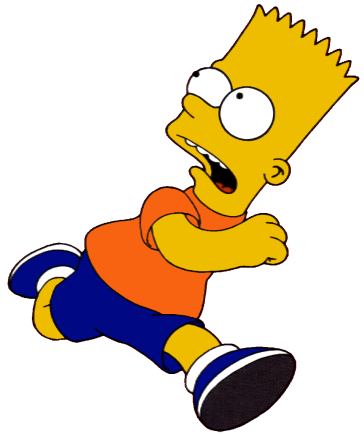

In [ ]:
tf.keras.preprocessing.image.load_img(r'/content/training_set/bart/bart100.bmp')

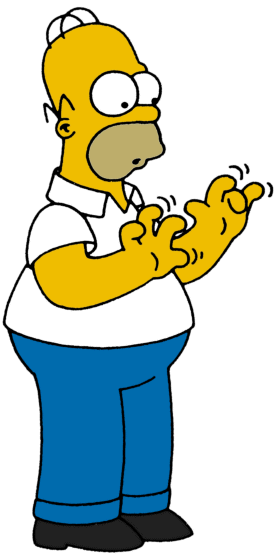

In [ ]:
tf.keras.preprocessing.image.load_img(r'/content/training_set/homer/homer100.bmp')

## Construção das bases de treinamento e teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)
base_treinamento = gerador_treinamento.flow_from_directory('/content/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = 8,
                                                           class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [ ]:
base_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
base_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
base_teste = gerador_teste.flow_from_directory('/content/test_set', #Atualizado: 02/05/2021 - Linha corrigida: gerador_treinamento.flow_from_director --> gerador_teste.flow_from_directory
                                                     target_size = (64, 64),
                                                     batch_size = 8,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 73 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [ ]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 2, activation='softmax'))

In [ ]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
rede_neural.fit_generator(base_treinamento, epochs=100, validation_data=base_teste)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
25/25 [==============================] - 3s 76ms/step - loss: 0.7263 - accuracy: 0.6132 - val_loss: 0.6540 - val_accuracy: 0.5753
Epoch 2/100
25/25 [==============================] - 2s 66ms/step - loss: 0.6838 - accuracy: 0.5570 - val_loss: 0.6192 - val_accuracy: 0.5753
Epoch 3/100
25/25 [==============================] - 2s 65ms/step - loss: 0.5636 - accuracy: 0.6460 - val_loss: 0.6273 - val_accuracy: 0.8082
Epoch 4/100
25/25 [==============================] - 2s 66ms/step - loss: 0.6108 - accuracy: 0.6260 - val_loss: 0.5753 - val_accuracy: 0.8219
Epoch 5/100
25/25 [==============================] - 2s 65ms/step - loss: 0.5435 - accuracy: 0.7580 - val_loss: 0.6297 - val_accuracy: 0.6849
Epoch 6/100
25/25 [==============================] - 2s 66ms/step - loss: 0.5574 - accuracy: 0.7201 - val_loss: 0.5431 - val_accuracy: 0.7945
Epoch 7/100
25/25 [==============================] - 2s 66ms/step - loss: 0.4980 - accuracy: 0.7874 - val_loss: 0.6108 - val_accuracy: 0.7534
Epoch 

## Avaliação da rede neural

In [ ]:
base_teste.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
previsoes = rede_neural.predict(base_teste)
previsoes

array([[1.0000000e+00, 2.0179862e-09],
       [9.9997091e-01, 2.9117798e-05],
       [9.9998999e-01, 1.0038170e-05],
       [1.0000000e+00, 4.8160098e-14],
       [1.0000000e+00, 4.0864570e-08],
       [1.0000000e+00, 5.7455474e-10],
       [7.4915618e-01, 2.5084382e-01],
       [9.9998820e-01, 1.1755862e-05],
       [9.9999988e-01, 1.2678481e-07],
       [3.1962577e-02, 9.6803749e-01],
       [6.3455239e-02, 9.3654478e-01],
       [9.7779423e-01, 2.2205731e-02],
       [1.2273582e-02, 9.8772639e-01],
       [9.9999583e-01, 4.2143770e-06],
       [9.9168217e-01, 8.3178319e-03],
       [9.9963045e-01, 3.6949522e-04],
       [9.9998748e-01, 1.2467418e-05],
       [1.0000000e+00, 1.2143839e-15],
       [1.2273582e-02, 9.8772639e-01],
       [9.9997628e-01, 2.3737135e-05],
       [8.5975611e-01, 1.4024390e-01],
       [1.0000000e+00, 3.6917124e-17],
       [1.2273582e-02, 9.8772639e-01],
       [9.9999917e-01, 8.7479788e-07],
       [9.9999964e-01, 3.5428033e-07],
       [9.9793363e-01, 2.

In [ ]:
import numpy as np
previsoes2 = np.argmax(previsoes, axis = 1)
previsoes2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes2, base_teste.classes)

0.8904109589041096

In [ ]:
base_teste.class_indices

{'bart': 0, 'homer': 1}

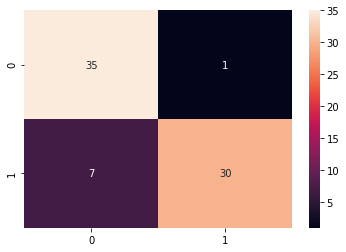

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(previsoes2, base_teste.classes)
sns.heatmap(cm, annot=True)